In [1]:
import glob

clean_files = sorted(glob.glob('/home/seth/Notes/HDW/test/test_xml/*.xml'))

print(len(clean_files))

37


Compile good and bad snippets from the training/testing corpus.

In [2]:
import re
from lxml import etree
from nltk.corpus import stopwords
#nltk stopwords.words('french') was letting through some inexplicable stuff, so we add a few words to it.
sw = set(stopwords.words('french') + ['ici', 'là', 'elles', 'trop', 'tous', 'selon', 'presque', 'tant', 
                                      'fois', 'quant', 'ainsi', 'cette', 'doit', 'tout', 'bien', 'toute', 
                                      'si', 'autre', 'sans', 'comment', 'rien', 'là', 'peu', 'mêmes', 'si', 
                                      'plutôt', 'ceux', 'faire', 'moins', 'être', 'faudra', 
                                      'deux', 'a', 'paris', 'plus', 'où', 'saint', 'cette', 'toutes'])

def is_number(w):

    result = False
    
    try:
        n = int(w)
        result = True
    except ValueError:
        pass
    
    return result

#function to eliminate the actual search terms (official names from place_index.csv, place_name field, + variants)
def is_t_valid(t):
    
    terms_to_find= [r'Notre-\s*Dame', 'Cité', 'Saint-\s*Louis', 'Arènes', 
        r'Palais\s*de\s*Justice|Palais-\s*de-\s*Justice',
        'Morgue', r'Sainte-\s*Chapelle', 'Conciergerie', r'[Qq]uai\s*de\s*l\'Horloge', r'Pont-\s*Neuf', r'Cluny|Thermes',
        r'Saint-\s*Germain-\s*des-\s*Prés', 'Nesle', r'[Ss]aint-\s*Sulpice', r'[Pp]alais\s*du\s* Luxembourg', 
        r'[Jj]ardin\s*du\s*Luxembourg', 'Observatoire', r'Panthéon|Sainte-\s*Geneviève', r'[Eéeé]glise\s*Saint-\s*Étienne',
        'Odéon', r'[Jj]ardin\s*des\s*Plantes', 'Gobelins', 'Auxerrois', 'Louvre', r'Carrousel|Doyenné', 'Tuileries', 
        r'Palais-\s*Royal', r'Comédie-\s*Française', 'Bourse', 'Innocents', 'Halles', r'Saint-\s*Eustache', 'Temple',
        r'[Tt]our\s*Saint-\s*Jacques', r'H[oôóòö]tel\s*de\s*Ville|Gr[eêéèë]ve', 'Rivoli', 
        r'Bastille|[Cc]olonne\s*de\s*Juillet', 'Tournelles', r'[Bb]oulevar[dt]\s*de\s*la\s*Madeleine', 'Capucines',
        r'[Bb]oulevard\s*des\s*Italiens', r'[Bb]oulevar[dt]\s*Montmartre', r'[Bb]oulevar[dt]\s*Poissonnière',
        r'[Bb]oulevar[dt]\s*Bonne-\s*Nouvelle', r'[Bb]oulevar[dt]\s*Saint-\s*Denis', r'[Bb]oulevar[dt]\s*Saint-\s*Martin',
        r'[Bb]oulevar[dt]\s*du\s*Temple|[Bb]oulevard\s*du\s*crime', r'[Bb]oulevar[dt]\s*des\s*Filles', 'Beaumarchais',
        r'[Pp]orte\s*Saint-Denis', r'[Cc]afé\s*Tortoni', r'[Cc]afé\s*Anglais', 'Maison-\s*Dorée', 
        r'Notre-\s*Dame-\s*de-\s*Lorette', 'Opéra-\s*[Cc]omique', 'Panorama', 'Opéra', r'[Aa]venue\s*\s*de\s*l’Op[eé]ra',
        r'[Rr]ue\s*de\s*la\s*Paix|[Rr]ue\s*\de\s* Napoléon', 'Vivienne', r'[Rr]ue\s*Saint-\s*Jacques', 
        r'[Rr]ue\s*Saint-\s*Denis', r'[Ff]aubourg\s*Saint-\s*Honoré', r'[Rr]ue\s*du\s*[Ff]aubourg\s*Saint-\s*Antoine',
        r'[Ff]aubourg\s*Saint-\s*Antoine', r'[Pp]lace\s*des\s*Vosges|Place\s*Royale', r'Champs-\s*Elysées', 
        r'Concorde|[Pp]lace\s*Louis[.\s*]XV|obélisque', r'[EÉ]toile|Triomphe', 'Vend[oôóòö]me', r'[Ll]a\s*Madeleine', 
        'Caire', r'des\s*Miracles', r'Quinze-\s*Vingts', r'cimeti[eêéèë]re\s*du\s*P[eêéèë]re-\s*Lachaise,' 
        r'[Bb]utte\s*Montmartre', r'Montfaucon|[Vv]oierie', 'Chaumont', r'[Cc]h[aâáàä]teau\s*de\s*Vincennes', 'Invalides',
        r'[Eéeé]cole\s*Militaire|Champ-\s*de-\s*Mars', 'Grenelle']   
    
    result = False
    
    if t > '':
        
        was_matched = False
        for term in terms_to_find:
        
            for match in re.finditer(term, t, flags=re.IGNORECASE):
                was_matched = True
                
            if was_matched == True:
                break
        
        if was_matched == False and is_number(t) == False:
            result = True
        
    return result

#a tokenization function that lower-cases, eliminates extra spaces, checks for 
#validity against list of search terms, and eliminates stopwords.
def tokenize_text(text):
    
    clean_text = re.sub(r'[^\s0123456789abcdefghijklmnopqrstuvwxyzàâäæçèéêëîïñôùûüÿœ̀]',
                       ' ',
                       text.lower())
    clean_text = re.sub('\s+', ' ', clean_text)
    
    return [t for t in clean_text.lower().split(' ') if is_t_valid(t) and t not in sw]

# ----------------------------------------------------------------------------------------

#print(sorted(sw))  #diplays the list of stopwords

good_text = []
bad_text = []

for a in clean_files:
    
    print(a)     #print file names to see progress
    
    tree = etree.parse(a)
    
    for node in tree.xpath('//snippet'):
        if node.get('quality') != None and node.get('quality') == 'good':
            good_text.append(tokenize_text(node.text))  #if marked "quality=good," tokenize and add to [good_text]
        elif node.get('confirmed') != None and node.get('confirmed') == 'yes':
            good_text.append(tokenize_text(node.text)) #if marked "yes," do the same
        elif node.get('classifier_result') != None and node.get('classifier_result') == 'good':
            pass  #if marked "classifier_result=good," do nothing
        else:
            bad_text.append(tokenize_text(node.text))
    
print() #just prints a blank line?
print('len(good_text)', len(good_text), #say how many good and bad snippets are in training/testing corpus
      'len(bad_text)', len(bad_text))

/home/seth/Notes/HDW/test/test_xml/About_1861_bpt6k64392756_test.xml
/home/seth/Notes/HDW/test/test_xml/Abrantès_1844_bpt6k6472523f_test.xml
/home/seth/Notes/HDW/test/test_xml/Achard_1860_bpt6k113880g_test.xml
/home/seth/Notes/HDW/test/test_xml/Amigues_1871_bpt6k54697084_test.xml
/home/seth/Notes/HDW/test/test_xml/Asti_1843_bpt6k6471672z_test.xml
/home/seth/Notes/HDW/test/test_xml/Auberive_1860_bpt6k6394066d_test.xml
/home/seth/Notes/HDW/test/test_xml/Balleydier_1849_bpt6k105490w_test.xml
/home/seth/Notes/HDW/test/test_xml/Balzac_1841_bpt6k1133819_test.xml
/home/seth/Notes/HDW/test/test_xml/Bamboches_amoureuses_1840_bpt6k1164416j_test.xml
/home/seth/Notes/HDW/test/test_xml/Banville_1866_bpt6k205836j_test.xml
/home/seth/Notes/HDW/test/test_xml/Becker_1837_bpt6k105479m_test.xml
/home/seth/Notes/HDW/test/test_xml/Bellet_1857_bpt6k6456840p_test.xml
/home/seth/Notes/HDW/test/test_xml/Bonneville_1830_bpt6k5530903c_test.xml
/home/seth/Notes/HDW/test/test_xml/Bréauté_1845_bpt6k64714083_test

In [3]:
import random, pickle
from gensim import corpora, matutils
import time
from sklearn.naive_bayes import *
from sklearn import tree, svm
from sklearn.linear_model import *
from sklearn.ensemble import *
    
def report_results(testing_labels, predicted, n_try, classifier):
    
    testing_counts = {}
    for l in testing_labels:
        if l not in testing_counts:
            testing_counts[l] = 0
        testing_counts[l] += 1
    
    results = {}

    for a in range(0, len(testing_labels)):
        k = testing_labels[a] + ' ' + predicted[a]
        if k not in results:
            results[k] = 0
        results[k] += 1
    
    final_results = {'n_try': n_try, 'classifier': classifier}
    
    #print()
    for k, v in results.items():
    #    print('\t', k, v, (v / testing_counts[k.split(' ')[0]]))
        final_results[k + ' n'] = v
        final_results[k + ' pct'] = (v / testing_counts[k.split(' ')[0]])
    #print()
    
    return final_results


# -----------------------------------------------------------------------------

all_final_results = []

for n_try in range(0, 1):
    
    print('\t', 'n_try', n_try)

    # -----------------------------------------------------------------------------

    random.shuffle(good_text)
    random.shuffle(bad_text)

    training_data = [['good', text] for text in good_text] + \
                    [['bad', text] for text in bad_text]

    testing_data = [['good', text] for text in good_text] + \
                    [['bad', text] for text in bad_text]

    # -----------------------------------------------------------------------------

    dictionary = corpora.Dictionary([text[1] for text in training_data] + \
                                    [text[1] for text in testing_data])

    training_labels = [text[0] for text in training_data]
    training_corpus = [dictionary.doc2bow(text[1]) for text in training_data]

    testing_labels = [text[0] for text in testing_data]
    testing_corpus = [dictionary.doc2bow(text[1]) for text in testing_data]

    training_matrix = matutils.corpus2dense(training_corpus, len(dictionary))
    training_matrix = training_matrix.T

    testing_matrix = matutils.corpus2dense(testing_corpus, len(dictionary))
    testing_matrix = testing_matrix.T

    # -----------------------------------------------------------------------
    
    start_time = time.time()

    clf = svm.SVC()
    clf = clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('SVC', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'SVC'))

    # -----------------------------------------------------------------------

    filename = 'SVC.saved_classifier.sav'
    pickle.dump(clf, open(filename, 'wb'))

    print()
    print('classifier saved!')

    dictionary.save('SVC.classifier_dictionary.dict') 

    print()
    print('dictionary saved!')


	 n_try 0
SVC score 0.9430863254392666 488.7834448814392

classifier saved!

dictionary saved!


In [4]:
print(len(all_final_results))
print(all_final_results[0])

for a in range(0, len(all_final_results)):
    if 'bad good n' not in all_final_results[a]:
        all_final_results[a]['bad good n'] = 0
        all_final_results[a]['bad good pct'] = 0.0

1
{'n_try': 0, 'classifier': 'SVC', 'good good n': 180, 'good good pct': 0.5487804878048781, 'good bad n': 148, 'good bad pct': 0.45121951219512196, 'bad bad n': 2289, 'bad bad pct': 0.9995633187772925, 'bad good n': 1, 'bad good pct': 0.0004366812227074236}


In [6]:
import sklearn
print(sklearn.__version__)

0.21.3


In [5]:
import pandas as pd

df = pd.DataFrame(all_final_results)
df.to_csv('23_classifier_comparison.csv', index=False)

print('ok')

ok


SVC mean bad good n (x) 1
SVC mean good good n (y) 180
SVC good good / bad good n ratio 180.0


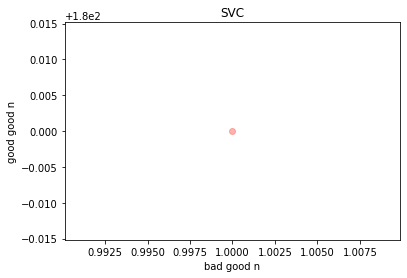

In [6]:
%matplotlib inline
import statistics
import matplotlib.pyplot as plt

classifier_names = []
for r in all_final_results:
    classifier_names.append(r['classifier'])

classifier_names = sorted(list(set(classifier_names)))

mean_data = []

for classifier_name in classifier_names:
    
    x = []
    y = []
    c = []
    
    match_x = []
    match_y = []
    
    for r in all_final_results:
        
        if r['classifier'] == classifier_name:
            pass
        else:
            try:
                x.append(r['bad good n'])
            except KeyError:
                x.append(0)
            try:
                y.append(r['good good n'])
            except KeyError:
                y.append(0)
            c.append('#A7C7E7')
    
    for r in all_final_results:
        
        if r['classifier'] == classifier_name:
            try:
                x.append(r['bad good n'])
                match_x.append(r['bad good n'])
            except KeyError:
                x.append(0)
                match_x.append(0)
            try:
                y.append(r['good good n'])
                match_y.append(r['good good n'])
            except:
                y.append(0)
                match_y.append(0)
            c.append('#ff6961')
        else:
            pass
        
    print(classifier_name, 'mean bad good n (x)', statistics.mean(match_x))
    print(classifier_name, 'mean good good n (y)', statistics.mean(match_y))
    print(classifier_name, 'good good / bad good n ratio', (statistics.mean(match_y) / statistics.mean(match_x)))
        
    mean_data.append({'run': '06', 'classifier_name': classifier_name, 
                          'false positive n': statistics.mean(match_x), 
                          'true positive n': statistics.mean(match_y),
                          'n true positive to false positive': (statistics.mean(match_y) / statistics.mean(match_x))})
        
        
    plt.scatter(x, y, c=c, alpha=0.5)
    plt.title(classifier_name)
    plt.xlabel('bad good n')
    plt.ylabel('good good n')
    
    plt.show()
    

In [7]:
import re, json

#print(re.sub('\}, ', '},\n', str(mean_data)) + ' \\ +')

f = open('12_mean_data.json', 'w', encoding='utf-8')
f.write(json.dumps(mean_data, indent=4))
f.close()

print('ok')

ok
